In [6]:
#Written by Yagmur Parmaksiz 19.09.2024

In [7]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
# load xlsx file note that Pandas requires the openpyxl library to read .xlsx files.
train_data = pd.read_excel("side_effect_data.xlsx")
train_data.head() #default size 5

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


In [19]:
train_data.describe() # To get summary statistics for numerical columns

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


In [20]:
train_data.columns # List all column names in the DataFrame

Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')

In [21]:
train_data.info() # To get a summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

In [22]:
train_data.shape #It provides the dimensions of the DataFrame, which includes the number of rows and columns.

(2357, 19)

In [23]:
train_data.index #To get the index of the DataFrame


RangeIndex(start=0, stop=2357, step=1)

In [25]:
train_data.dtypes #To get data types of each column

Kullanici_id                                 int64
Cinsiyet                                    object
Dogum_Tarihi                        datetime64[ns]
Uyruk                                       object
Il                                          object
Ilac_Adi                                    object
Ilac_Baslangic_Tarihi               datetime64[ns]
Ilac_Bitis_Tarihi                   datetime64[ns]
Yan_Etki                                    object
Yan_Etki_Bildirim_Tarihi            datetime64[ns]
Alerjilerim                                 object
Kronik Hastaliklarim                        object
Baba Kronik Hastaliklari                    object
Anne Kronik Hastaliklari                    object
Kiz Kardes Kronik Hastaliklari              object
Erkek Kardes Kronik Hastaliklari            object
Kan Grubu                                   object
Kilo                                       float64
Boy                                        float64
dtype: object

In [26]:
train_data.isnull() #Check for missing values in each column

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
2353,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2354,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2355,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [27]:
train_data.isnull().sum() #How many null values are there in each column?

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64

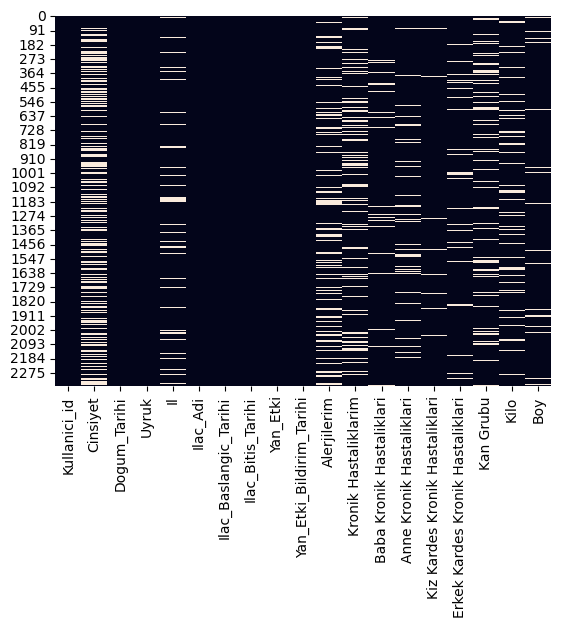

In [28]:
#Use a heatmap to visualize where missing data is present.
sns.heatmap(train_data.isnull(), cbar=False)
plt.show()


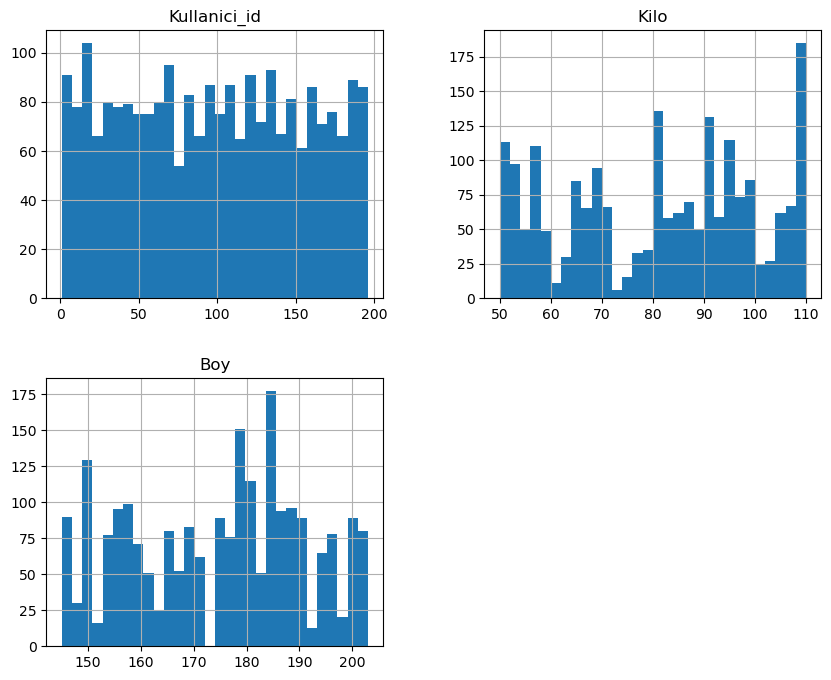

In [32]:
# Provide numerical columns
numerical_columns = train_data.select_dtypes(include=['number']).columns

# Plot histograms for numerical columns
if not numerical_columns.empty:
    train_data[numerical_columns].hist(bins=30, figsize=(10, 8))
    plt.show()
else:
    print("No numerical columns to plot.")


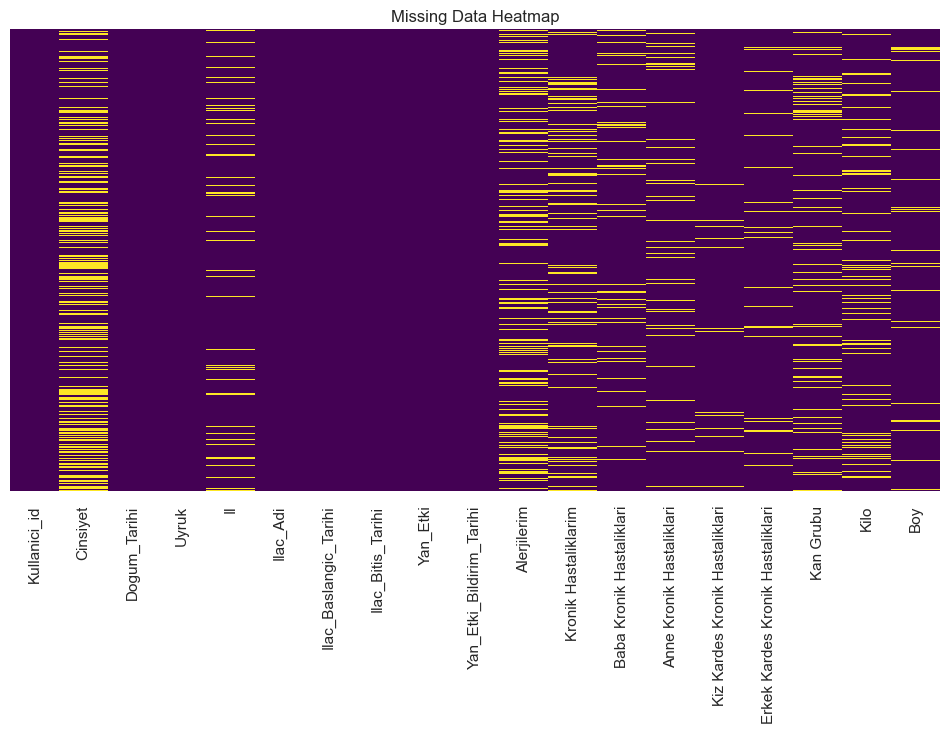

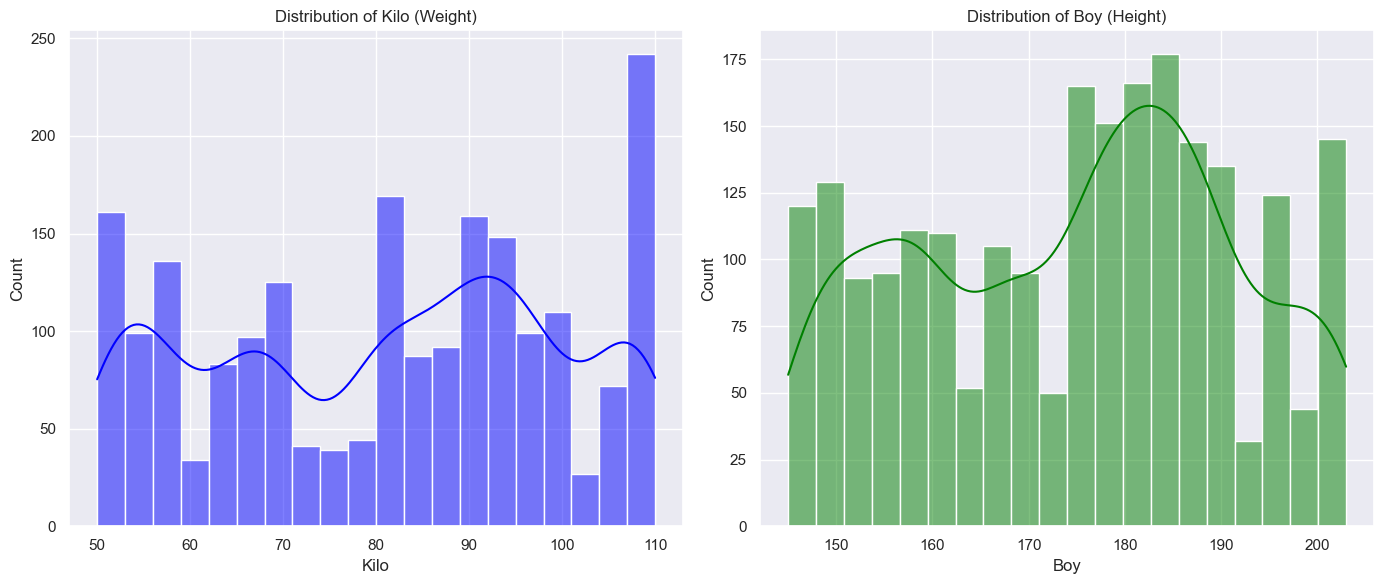

In [39]:
# Set up the plot style
sns.set(style="darkgrid")

# Visualize missing data using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

# Distribution plots for Kilo (Weight) and Boy (Height) to observe their distribution
plt.figure(figsize=(14, 6))

# Kilo distribution
plt.subplot(1, 2, 1)
sns.histplot(train_data['Kilo'].dropna(), kde=True, color='blue', bins=20)
plt.title('Distribution of Kilo (Weight)')

# Boy distribution
plt.subplot(1, 2, 2)
sns.histplot(train_data['Boy'].dropna(), kde=True, color='green', bins=20)
plt.title('Distribution of Boy (Height)')

plt.tight_layout()
plt.show()


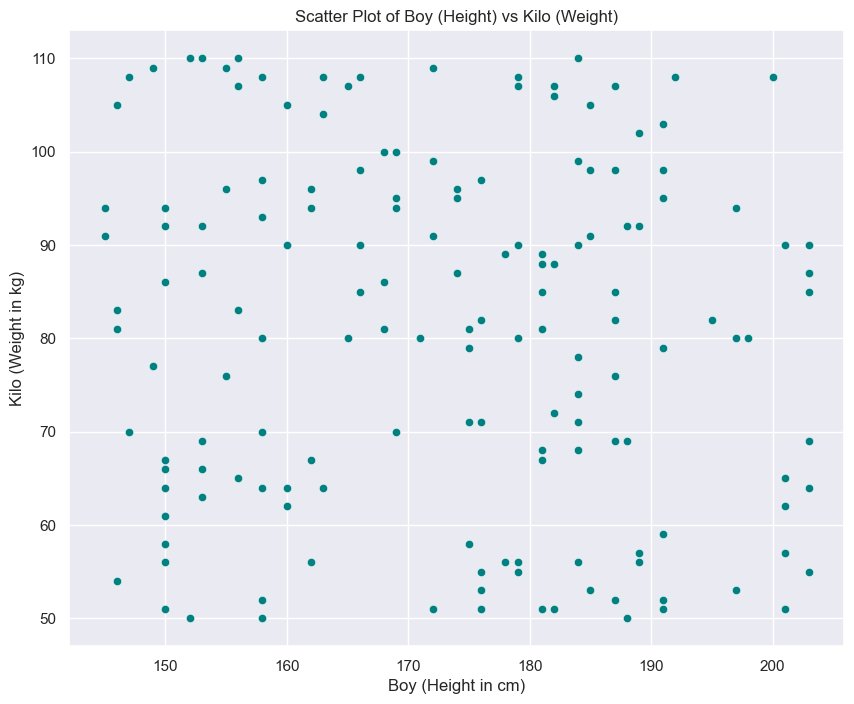

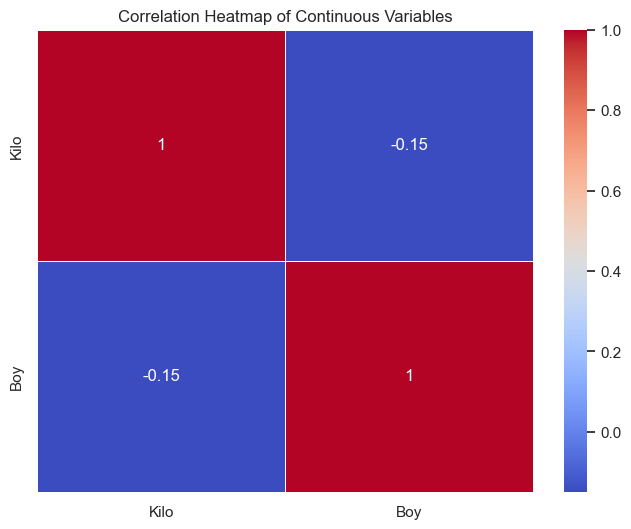

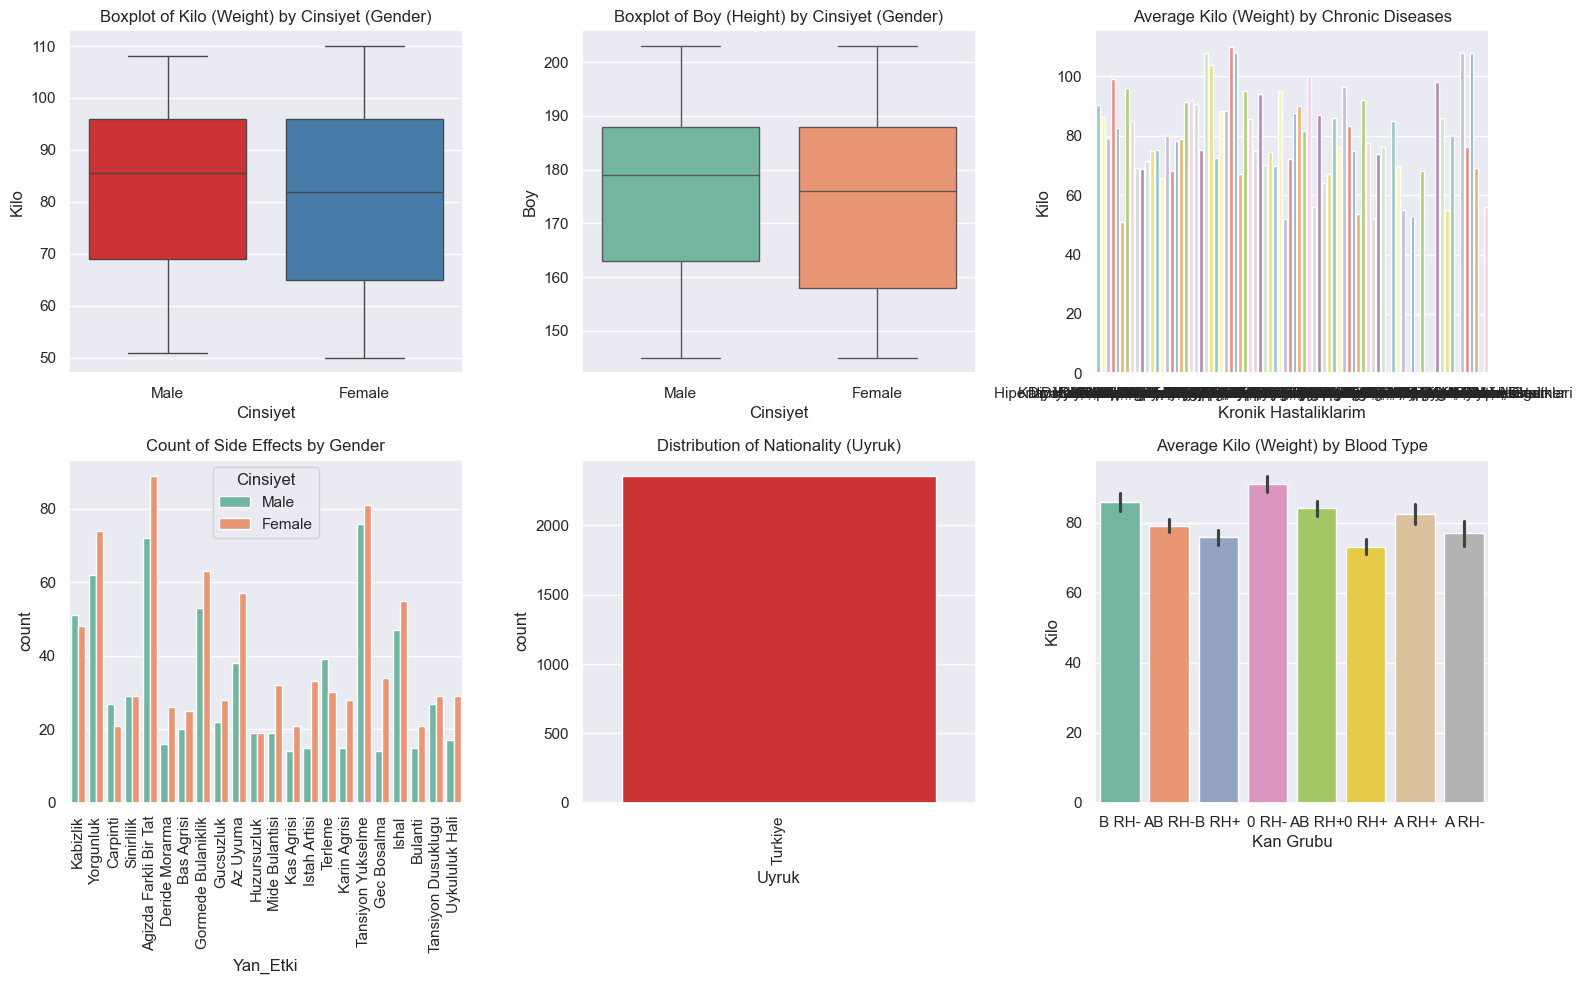

In [46]:
# Set up figure size for the scatter plot and correlation matrix
plt.figure(figsize=(10, 8))

# Scatter plot between Boy (Height) and Kilo (Weight)
sns.scatterplot(x='Boy', y='Kilo', data=train_data, alpha=0.7, color='teal')
plt.title('Scatter Plot of Boy (Height) vs Kilo (Weight)')
plt.xlabel('Boy (Height in cm)')
plt.ylabel('Kilo (Weight in kg)')
plt.show()

continuous_vars = train_data[['Kilo', 'Boy']]  # You can add other continuous variables if needed
corr_matrix = continuous_vars.corr()

# Heatmap of the correlation matrix for continuous variables
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

# Now, let's visualize relationships between the categorical and continuous variables:
plt.figure(figsize=(16, 10))

# Boxplot: Kilo (Weight) distribution by Cinsiyet (Gender)
plt.subplot(2, 3, 1)
sns.boxplot(x='Cinsiyet', y='Kilo', hue='Cinsiyet', data=train_data, palette='Set1', legend=False)
plt.title('Boxplot of Kilo (Weight) by Cinsiyet (Gender)')

# Boxplot: Boy (Height) distribution by Cinsiyet (Gender)
plt.subplot(2, 3, 2)
sns.boxplot(x='Cinsiyet', y='Boy', hue='Cinsiyet', data=train_data, palette='Set2', legend=False)
plt.title('Boxplot of Boy (Height) by Cinsiyet (Gender)')

# Barplot: Average Kilo (Weight) by Kronik Hastaliklarim (Chronic Diseases)
plt.subplot(2, 3, 3)
sns.barplot(x='Kronik Hastaliklarim', y='Kilo', hue='Kronik Hastaliklarim', data=train_data, errorbar=None, palette='Set3', legend=False)
plt.title('Average Kilo (Weight) by Chronic Diseases')

# Barplot: Count of Yan_Etki (Side Effects) by Cinsiyet (Gender)
plt.subplot(2, 3, 4)
sns.countplot(x='Yan_Etki', hue='Cinsiyet', data=train_data, palette='Set2')
plt.xticks(rotation=90)
plt.title('Count of Side Effects by Gender')

# Countplot: Distribution of Uyruk (Nationality)
plt.subplot(2, 3, 5)
sns.countplot(x='Uyruk', hue='Uyruk', data=train_data, palette='Set1', legend=False)
plt.title('Distribution of Nationality (Uyruk)')
plt.xticks(rotation=90)

# Barplot: Average Weight by Blood Type (Kan Grubu)
plt.subplot(2, 3, 6)
sns.barplot(x='Kan Grubu', y='Kilo', hue='Kan Grubu', data=train_data, palette='Set2', legend=False)
plt.title('Average Kilo (Weight) by Blood Type')

plt.tight_layout()
plt.show()
